### 0. Library

In [1]:
import pandas as pd
import re
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('E:/UIT/Năm-2/Kì-2/Predicting-Popularity-of-Vietnamese-Articles/2. Data Pre-processing/dataset2.csv')

### 1. Title processing

In [3]:
# ===== TỪ KHÓA CẢM XÚC & NGHI VẤN =====
emotional_words = ['sốc', 'khẩn cấp', 'cảnh báo', 'kịch tính', 'gay cấn', 'bất ngờ',
                  'ngỡ ngàng', 'đáng sợ', 'gây ức chế', 'thất vọng', 'đau lòng',
                  'tuyệt vời', 'cảm động', 'siêu hot', 'chưa từng có', 'đầu tiên',
                  'cuối cùng', 'nhất', 'suýt', 'chấn động', 'phẫn nộ', 'khó tin',
                  'rúng động', 'kinh hoàng', 'bức xúc', 'xót xa', 'nghẹn ngào',
                  'bật khóc', 'không thể tin nổi', 'hé lộ', 'bí mật', 'lần đầu tiên',
                  'gây tranh cãi', 'gây sốt', 'đỉnh cao', 'không ngờ tới', 'sự thật phía sau',
                  'điều đặc biệt', 'run sợ', 'làm dấy lên làn sóng']
question_words = ['tại sao', 'vì sao', 'bao nhiêu', 'mấy', 'bao lâu', 'tới mức nào', 'đến đâu',
                  'ai', 'người nào', 'kẻ nào', 'gì', 'chuyện gì', 'điều gì', 'vấn đề gì', 'sự thật nào',
                  'làm sao', 'như thế nào', 'bằng cách nào', 'cách nào',
                  'khi nào', 'lúc nào', 'bao giờ', 'ở đâu', 'nơi nào',
                  'phải chăng', 'liệu', 'đúng không', 'có nên', 'có thể không', '?']

# ===== HÀM TRÍCH XUẤT ĐẶC TRƯNG =====
def extract_title_features(df):
    df['title_length'] = df['title'].apply(lambda title: len(str(title).split()))
    df['has_number'] = df['title'].apply(lambda title: int(bool(re.search(r'\d+', str(title)))))
    df['has_emotion'] = df['title'].apply(lambda title: int(any(re.search(r'\b' + re.escape(word) + r'\b', str(title).lower()) for word in emotional_words)))
    df['is_question'] = df['title'].apply(lambda title: int(any(re.search(r'\b' + re.escape(word) + r'\b', str(title).lower()) for word in question_words)))

# ===== LẶP THEO CHUYÊN MỤC =====
all_rows = []

for category in df['category'].dropna().unique():
    df_cat = df[df['category'] == category].copy()

    # Trích xuất đặc trưng
    extract_title_features(df_cat)

    # Huấn luyện hồi quy tuyến tính nếu có đủ dữ liệu
    if len(df_cat) >= 5:
        X = df_cat[['title_length', 'has_number', 'has_emotion', 'is_question']]
        y = df_cat['popularity_score']
        model = LinearRegression()
        model.fit(X, y)

        # Tính title_score
        df_cat['title_score'] = model.predict(X)
    else:
        # Nếu quá ít dữ liệu, không huấn luyện mô hình
        df_cat['title_score'] = None

    # Lưu lại
    all_rows.append(df_cat)

# Gộp lại toàn bộ
df = pd.concat(all_rows, ignore_index=True)

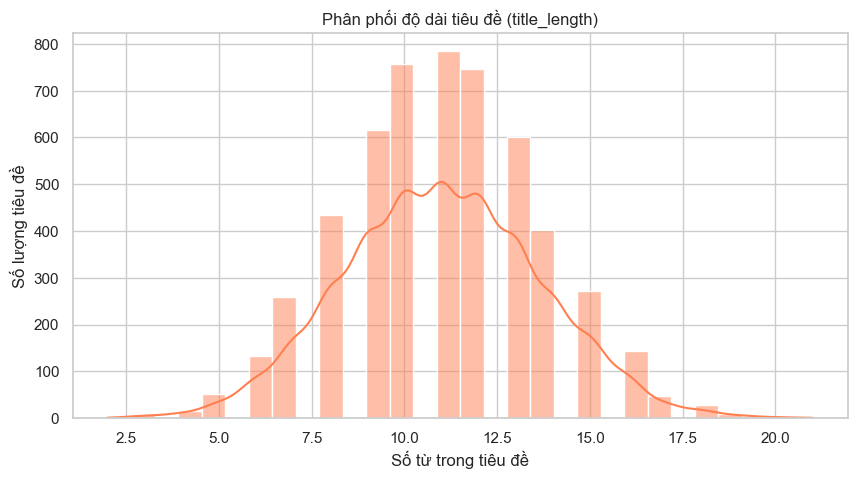

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3924\3841689534.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


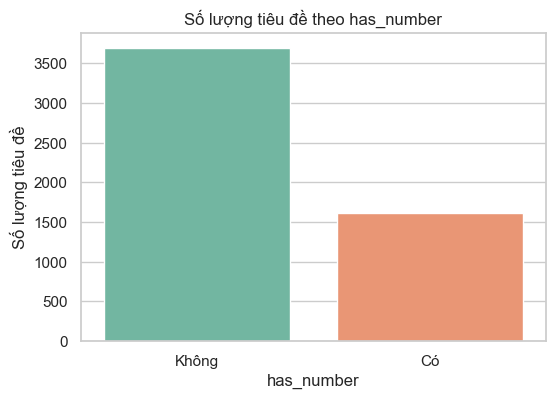

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3924\3841689534.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


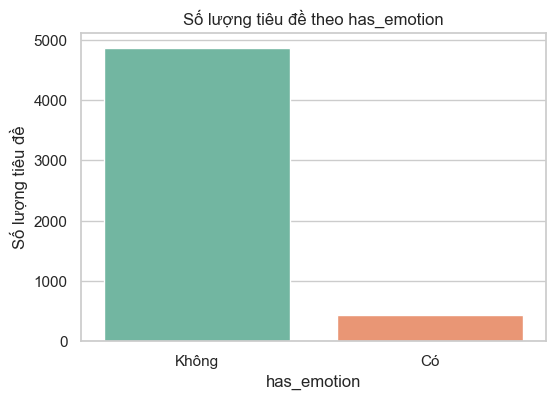

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3924\3841689534.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')


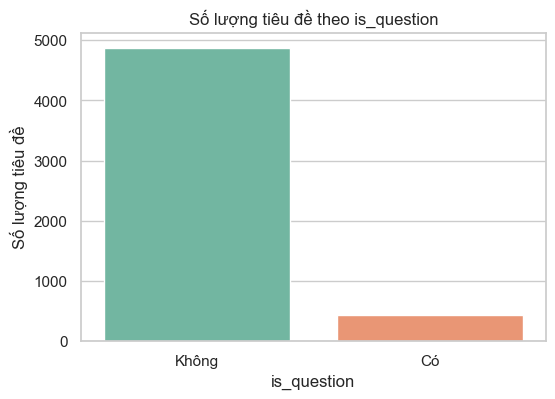

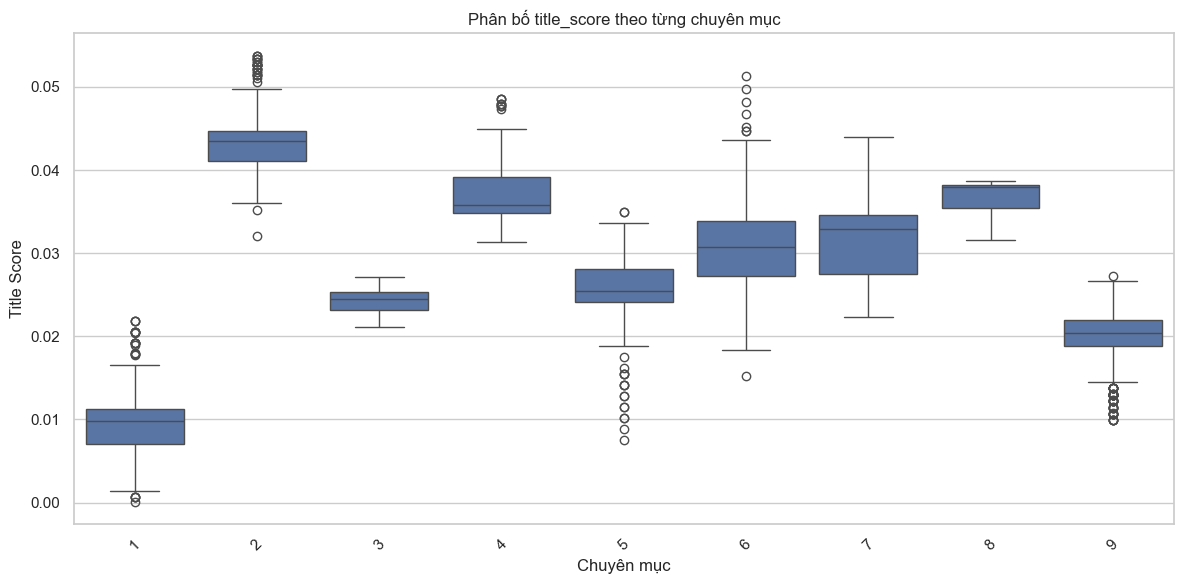

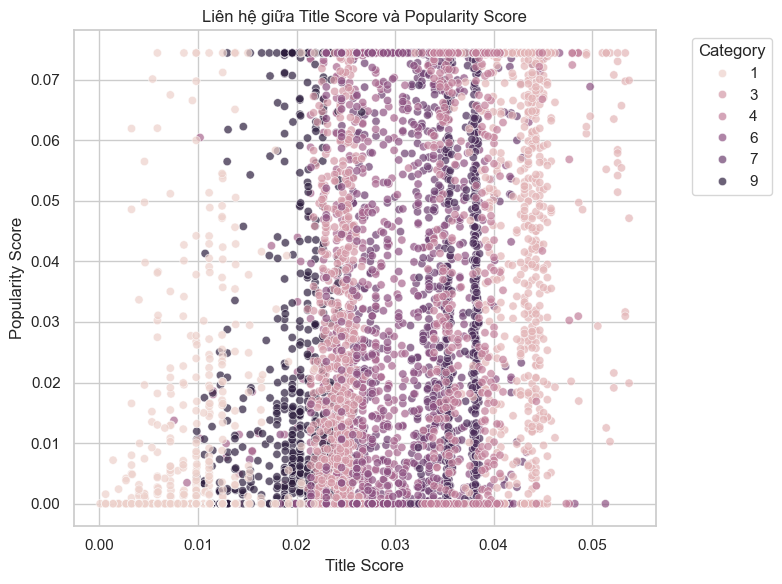

In [4]:
sns.set(style="whitegrid")

# 1. Histogram phân phối độ dài tiêu đề
plt.figure(figsize=(10, 5))
sns.histplot(df['title_length'].dropna(), bins=30, kde=True, color='coral')
plt.title('Phân phối độ dài tiêu đề (title_length)')
plt.xlabel('Số từ trong tiêu đề')
plt.ylabel('Số lượng tiêu đề')
plt.show()

# 2. Countplot các thuộc tính nhị phân: has_number, has_emotion, is_question
binary_features = ['has_number', 'has_emotion', 'is_question']
for feature in binary_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, palette='Set2')
    plt.title(f'Số lượng tiêu đề theo {feature}')
    plt.xlabel(feature)
    plt.ylabel('Số lượng tiêu đề')
    plt.xticks([0, 1], ['Không', 'Có'])
    plt.show()

# 3. Boxplot so sánh title_score theo từng chuyên mục
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category', y='title_score')
plt.title('Phân bố title_score theo từng chuyên mục')
plt.xlabel('Chuyên mục')
plt.ylabel('Title Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Scatterplot: Mối tương quan giữa title_score và popularity_score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='title_score', y='popularity_score', hue='category', alpha=0.7)
plt.title('Liên hệ giữa Title Score và Popularity Score')
plt.xlabel('Title Score')
plt.ylabel('Popularity Score')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

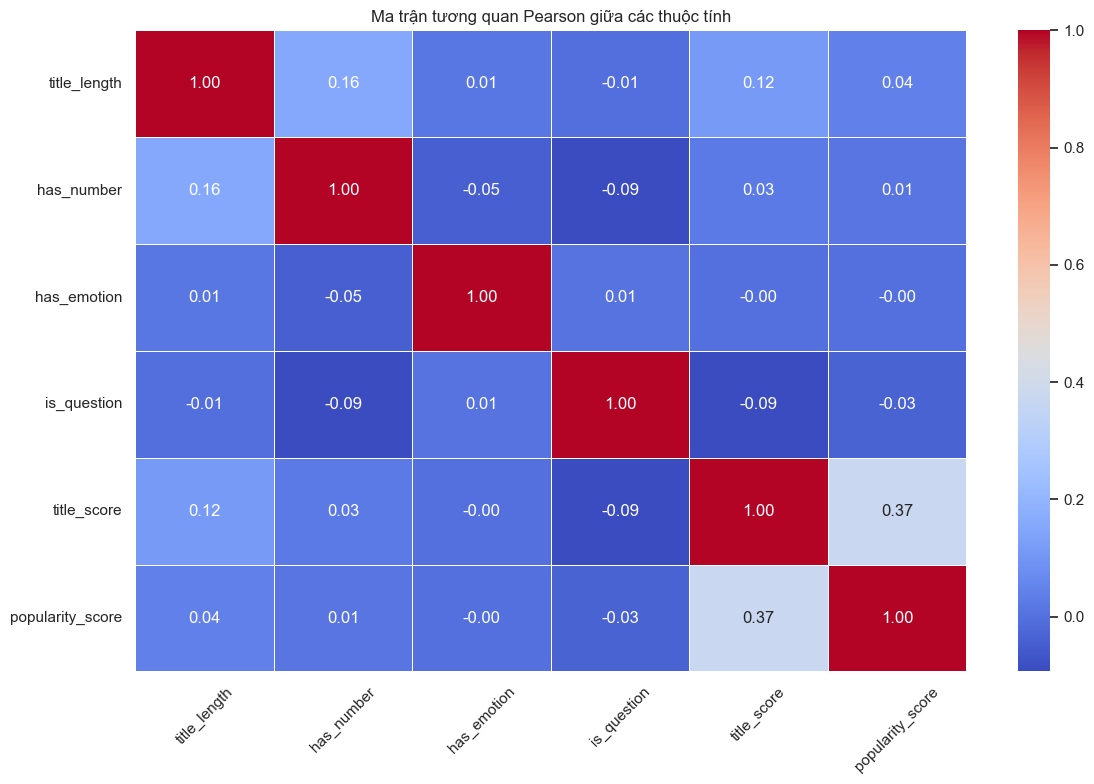

In [5]:
# Chọn các cột số để tính tương quan
numeric_cols = ['title_length', 'has_number', 'has_emotion', 'is_question',
                'title_score', 'popularity_score', 'sentiment_score',
                'positive', 'negative', 'neutral']

# Lọc ra các cột thực sự tồn tại và có giá trị số
available_cols = [col for col in numeric_cols if col in df.columns]

# Tính ma trận tương quan Pearson
correlation_matrix = df[available_cols].corr(method='pearson')

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Ma trận tương quan Pearson giữa các thuộc tính')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 1.1 Calculate Sentiment_Score

In [6]:
import torch
from transformers import RobertaForSequenceClassification, AutoTokenizer
from underthesea import word_tokenize
from scipy.special import softmax

# Tải tokenizer và mô hình
sentiment_tokenizer = AutoTokenizer.from_pretrained("wonrax/phobert-base-vietnamese-sentiment", use_fast=False)
sentiment_model = RobertaForSequenceClassification.from_pretrained("wonrax/phobert-base-vietnamese-sentiment")

In [7]:
# Hàm tính điểm cảm xúc
def get_sentiment_score(text):
    try:
        segmented_text = word_tokenize(str(text), format="text")
        input_ids = torch.tensor([sentiment_tokenizer.encode(segmented_text)])
        with torch.no_grad():
            outputs = sentiment_model(input_ids)
            scores = softmax(outputs.logits.numpy()[0])
        return {
            'positive': scores[1],
            'negative': scores[0],
            'neutral': scores[2],
            'sentiment_score': float(scores[1] - scores[0])
        }
    except Exception as e:
        print(f"❌ Lỗi với văn bản: {text} — {e}")
        return {
            'positive': 0.0,
            'negative': 0.0,
            'neutral': 0.0,
            'sentiment_score': 0.0
        }

# Tính điểm sentiment cho từng tiêu đề
sentiment_results = []
for title in df['title'].fillna('').tolist():
    sentiment = get_sentiment_score(title)
    sentiment_results.append(sentiment)

# Tạo DataFrame kết quả
sentiment_df = pd.DataFrame(sentiment_results)
sentiment_df['title'] = df['title'].values
df = pd.concat([df, sentiment_df[['sentiment_score', 'positive', 'negative', 'neutral']]], axis=1)

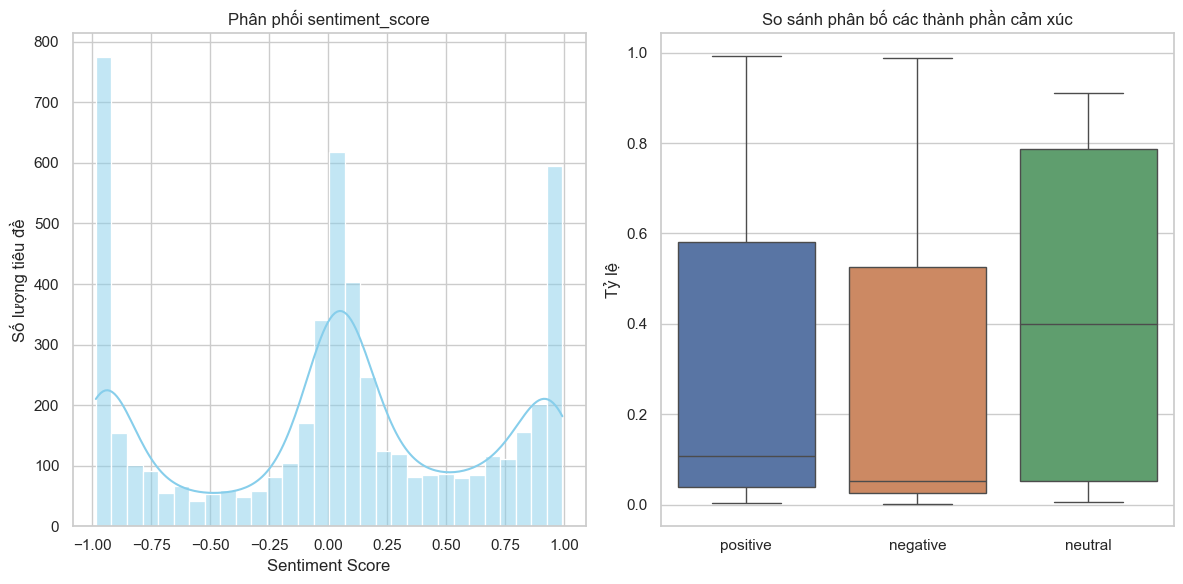

In [8]:
# Cài đặt hiển thị
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Histogram: Phân phối sentiment_score
plt.subplot(1, 2, 1)
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='skyblue')
plt.title('Phân phối sentiment_score')
plt.xlabel('Sentiment Score')
plt.ylabel('Số lượng tiêu đề')

# 2. Boxplot: So sánh phân bố positive, negative, neutral
plt.subplot(1, 2, 2)
sns.boxplot(data=df[['positive', 'negative', 'neutral']])
plt.title('So sánh phân bố các thành phần cảm xúc')
plt.ylabel('Tỷ lệ')

plt.tight_layout()
plt.show()

### 2. Time processing

In [9]:
weekday_mapping = {
    'thứ hai': 'Monday', 'thứ ba': 'Tuesday', 'thứ tư': 'Wednesday',
    'thứ năm': 'Thursday', 'thứ sáu': 'Friday', 'thứ bảy': 'Saturday',
    'chủ nhật': 'Sunday'
}

def extract_time_features(published_time):
    try:
        parts = published_time.split(',')
        weekday = weekday_mapping.get(parts[0].strip().lower())
        time_str = parts[2].split('(')[0].strip()
        hour = int(time_str.split(':')[0])
        return pd.Series([weekday, hour])
    except:
        return pd.Series([None, None])

# Áp dụng hàm để lấy weekday và posted_hour
df[['weekday', 'posted_hour']] = df['date'].apply(extract_time_features)

# Tạo cột is_weekday: 1 nếu là thứ 2-6, 0 nếu là thứ 7/chủ nhật
def is_weekday(weekday):
    return int(weekday in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

df['is_weekday'] = df['weekday'].apply(is_weekday)
df = df.drop(columns=['weekday'])


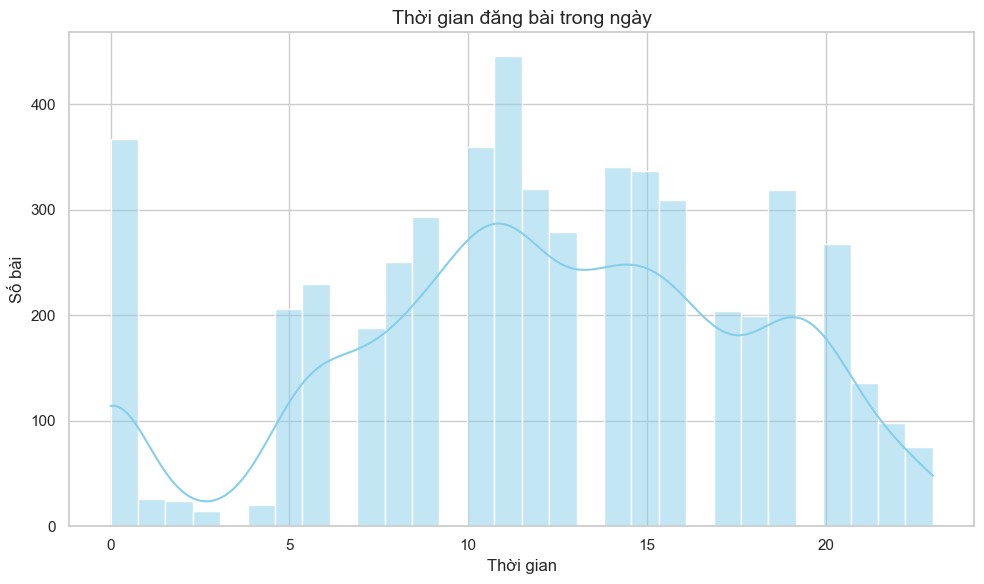

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style trực quan
sns.set(style="whitegrid")

# Vẽ histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['posted_hour'].dropna(), bins=30, kde=True, color='skyblue')

plt.title('Thời gian đăng bài trong ngày', fontsize=14)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Số bài', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3924\3866039882.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=is_weekday_counts.values, palette='crest')


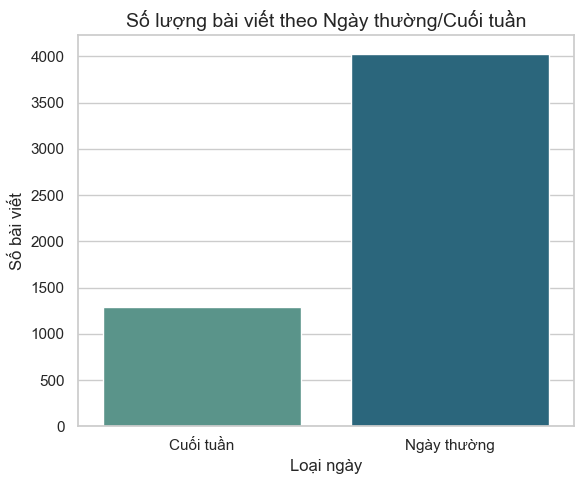

In [11]:
def plot_is_weekday_distribution(df):
    # Đếm số lượng bài viết theo is_weekday
    is_weekday_counts = df['is_weekday'].value_counts().sort_index()

    # Đổi nhãn cho trục x
    labels = ['Cuối tuần', 'Ngày thường']  # 0: Cuối tuần, 1: Ngày thường

    plt.figure(figsize=(6, 5))
    sns.barplot(x=labels, y=is_weekday_counts.values, palette='crest')
    plt.title('Số lượng bài viết theo Ngày thường/Cuối tuần', fontsize=14)
    plt.xlabel('Loại ngày', fontsize=12)
    plt.ylabel('Số bài viết', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_is_weekday_distribution(df)

### 3. Tag processing

In [12]:
province_aliases = {
    "hà nội": ["hn", "tp hà nội", "thủ đô"],
    "hồ chí minh": ["hcm", "tp hcm", "tp. hcm", "sài gòn", "sg"],
    "đà nẵng": ["tp đà nẵng"],
    "cần thơ": ["tp cần thơ"],
    "hải phòng": ["hp", "tp hải phòng"],
    "huế": ["thừa thiên huế"],
    "nha trang": ["tp nha trang"],
    "vũng tàu": ["bà rịa vũng tàu", "tp vũng tàu"],
    "biên hòa": ["tp biên hòa"],
    "thừa thiên huế": ["huế"],
    "đắk lắk": ["daklak"],
    "đắk nông": ["daknong"],
}

In [13]:
person_keywords = [
    "diễn viên", "ca sĩ", "cầu thủ", "huấn luyện viên", "giáo sư", "tiến sĩ", "bác sĩ",
    "luật sư", "phóng viên", "nhà báo", "giám đốc", "tổng thống", "thủ tướng",
    "chủ tịch", "công an", "kiểm sát", "bộ trưởng", "tác giả", "nhà văn",
    "thí sinh", "người mẫu", "nghệ sĩ", "MC", "CEO", "CTO", "diễn giả", "học sinh", "sinh viên"
]
place_keywords = list(province_aliases.keys()) + [
    "hà nội", "tp hcm", "tp. hcm", "hồ chí minh", "hn", "hcm", "đà nẵng", "cần thơ", "hải phòng",
    "bình dương", "biên hòa", "bắc ninh", "bắc giang", "nha trang", "vũng tàu", "huế",
    "quảng ninh", "đắk lắk", "thanh hóa", "nghệ an", "trường học", "bệnh viện",
    "công viên", "trung tâm thương mại", "sân bay", "nhà ga", "tòa nhà", "khu công nghiệp",
    "trường đại học", "trung tâm y tế", "khu dân cư", "trụ sở", "sở công an"
]
event_keywords = [
    "xét xử", "truy tố", "phiên tòa", "vụ án", "tai nạn", "động đất", "bão",
    "bầu cử", "diễn tập", "giải đấu", "chung kết", "sea games", "world cup",
    "triển lãm", "liveshow", "ra mắt", "họp báo", "khai mạc", "tổng kết",
    "thảm họa", "dự án", "phát hành", "hội thảo", "hội nghị", "điều tra",
    "bị bắt", "biểu tình", "tấn công", "mở bán", "kêu gọi vốn", "IPO"
]
org_keywords = [
    "công ty", "tập đoàn", "doanh nghiệp", "hiệp hội", "tổ chức",
    "bộ", "sở", "trung tâm", "viện", "ngân hàng", "trường học"
]

In [14]:
# Từ điển giả lập cho CN
tag_type_dict_cong_nghe = {
    "trí_tuệ_nhân_tạo_-_ai": "event", #tạm tính là event do xu hướng
    "apple_inc.": "org", #tạm tính là person do ko có org
    "deepseek": "event",
    "elon_musk": "person",
    "openai": "event",
    "trung_quốc": "place",
    "samsung": "org",
    "mỹ": "place",
    "donald_trump": "person",
    "công_ty_meta": "org",
    "google": "org",
    "tiktok": "org",
    "sam_altman": "person",
    "chatgpt": "event",
    "facebook": "event",
    "mark_zuckerberg": "person",
    "microsoft": "org",
    "việt_nam": "place",
    "bộ_khoa_học_và_công_nghệ": "org",
    "xiaomi": "org",
    "huawei": "org",
    "nvidia": "org",
    "tech_awards": "event",
    "fpt": "org",
    "bộ_trưởng_nguyễn_mạnh_hùng": "person",
}

In [15]:
# Từ điển giả lập cho CN
tag_type_dict_giai_tri = {
    "tp_hcm": "place",
    "giải_oscar": "event",
    "hà_nội": "place",
    "hoa_hậu": "person",
    "hòa_minzy": "person",
    "quý_bình": "person",
    "bùi_thạc_chuyên": "person",
    "kim_soo_hyun": "person",
    "kim_sae_ron": "person",
    "trịnh_công_sơn": "person",
    "h'hen_niê": "person",
    "thái_hòa": "person",
    "anh_trai_vượt_ngàn_chông_gai": "event",
    "california": "place",
    "tiểu_long_nữ": "person",
    "lisa": "person",
    "hollywood": "place",
    "demi_moore": "person",
    "selena_gomez": "person",
    "phương_mỹ_chi": "person",
    "scandal": "event",
    "diễn_viên_tvb": "person",
    "anh_trai_say_hi": "event",
    "jisoo": "persson",
    "adrien_brody": "person",
    "hồ_ngọc_hà": "person",
    "hồng_nhung": "person",
    "snow_white": "person",
    "gal_gadot": "person",
    "nàng_bạch_tuyết": "person",
    "huỳnh_lập": "person",
    "nguyễn_thúc_thùy_tiên": "person",
    "hà_anh_tuấn": "person",
    "ashley_st._clair": "person",
    "gene_hackman": "person",
    "blackpink": "person",
    "taylor_swift": "person",
    "hiếu_thứ_hai": "person",
}

In [16]:
# Từ điển giả lập cho CN
tag_type_dict_giao_duc = {
    "tuyển_sinh_đại_học_2025": "event",
    "thi_đánh_giá_năng_lực": "event",
    "bộ_giáo_dục_và_đào_tạo": "org",
    "tư_vấn_chọn_ngành": "event",
    "đại_học_quốc_gia_hà_nội": "org",
    "thi_vào_lớp_10": "event",
    "du_học_sinh": "person",
    "đại_học_quốc_gia_tp_hcm": "org",
    "tuyển_sinh_đại_học": "person",
    "đại_học_bách_khoa_hà_nội": "org",
    "hàn_quốc": "place",
    "phương_thức_xét_tuyển_đại_học": "event",
    "thông_tư_29": "event",
    "thủ_khoa": "person",
    "thầy_quang_nguyen": "person",
    "thi_đánh_giá_tư_duy": "event",
    "trường_quân_đội": "org",
    "thi_tốt_nghiệp_thpt_2025": "event",
    "canada": "place"
}

In [17]:
# Từ điển giả lập cho CN
tag_type_dict_khoa_hoc = {
    "cơ_quan_hàng_không_và_vũ_trụ_hoa_kỳ_nasa": "org",
    "spacex": "org",
    "phi_hành_gia": "person",
    "tp_hcm": "place",
    "biến_đổi_khí_hậu": "event",
    "kỷ_lục": "event",
    "thử_nghiệm": "event",
    "nhà_khoa_học": "person",
    "trạm_vũ_trụ_quốc_tế_iss": "org",
    "australia": "place",
    "nhật_bản": "place",
}

In [18]:
# Từ điển giả lập cho CN
tag_type_dict_kinh_doanh= {
    "giá_vàng_hôm_nay": "event",
    "thuế_đối_ứng_của_mỹ": "event",
    "vn-index": "org",
    "mexico": "place",
    "ngân_hàng": "org",
    "thuế": "event",
    "bộ_tài_chính": "org",
    "vingroup": "org",
    "fed": "org",
    "châu_âu": "place",
    "tỷ_phú": "person",
    "phạm_nhật_vượng": "person",
    "novaland": "org",
    "liên_minh_châu_âu_-_eu": "org",
    "vinhomes": "org",
    "hdbank": "org",
    "giá_xăng_hôm_nay": "event",
}

In [19]:
# Từ điển giả lập cho CN
tag_type_dict_phap_luat = {
    "giết_người": "event",
    "bộ_công_an": "org",
    "đồng_nai": "place",
    "cướp_tài_sản": "event",
    "tai_nạn_giao_thông": "event",
    "gây_rối_trật_tự_công_cộng": "event",
    "nghệ_an": "place",
    "hiếp_dâm": "event",
    "lừa_đảo_qua_mạng": "event",
    "quảng_nam": "place",
    "lừa_đảo_chiếm_đoạt_tài_sản": "event",
    "hà_tĩnh": "place",
    "bà_rịa_-_vũng_tàu": "place",
    "cố_ý_gây_thương_tích": "event",
    "hỗn_chiến": "event",
    "cháy_nhà": "event",
    "chung_cư_mini": "place",
    "thanh_hóa": "place",
    "tử_hình": "event",
    "kiên_giang": "place",
    "bắt_cóc": "event",
    "tập_đoàn_vạn_thịnh_phát": "org",
    "gia_lai": "place",
    "an_giang": "place",
    "vĩnh_long": "place",
    "nhận_hối_lộ": "event",
    "cà_mau": "place",
    "ngoại_tình": "event",
    "tiền_giang": "place",
    "tống_tiền": "event",
    "đưa_hối_lộ": "event",
    "tập_đoàn_phúc_sơn": "org"
}

In [20]:
# Từ điển giả lập cho CN
tag_type_dict_thoi_su = {
    "sáp_nhập_tỉnh_thành": "event",
    "sáp_nhập_xã_phường": "event",
    "tinh_gọn_bộ_máy": "event",
    "thủ_tướng_phạm_minh_chính": "person",
    "bình_thuận": "place",
    "bộ_quốc_phòng_việt_nam": "org",
    "dự_án_đường_cao_tốc_bắc_nam": "event",
    "tổng_bí_thư_tô_lâm": "person",
    "vi_phạm_giao_thông_đường_bộ": "event",
    "bộ_nội_vụ": "org",
    "quỹ_hy_vọng": "org",
    "hồ_gươm": "place",
    "myanmar": "place",
    "thành_phố_huế": "place",
    "tp_thủ_đức": "place",
    "bộ_trưởng_phạm_thị_thanh_trà": "person",
    "lễ_kỷ_niệm_50_năm_thống_nhất_đất_nước": "event",
    "phú_thọ": "place",
    "quảng_trường_đông_kinh_nghĩa_thục": "place"
}

In [21]:
# Từ điển giả lập cho CN
tag_type_dict_the_thao = {
    "real_madrid": "org",
    "tây_ban_nha": "place",
    "ngoại_hạng_anh": "event",
    "champions_league": "event",
    "đội_tuyển_bóng_đá_việt_nam": "org",
    "world_cup_2026": "event",
    "manchester_united": "org",
    "bình_dương": "place",
    "brazil": "place",
    "manchester_city": "place",
    "vnexpress_marathon_huế": "event",
    "đội_tuyển_bóng_đá_brazil": "org",
    "indonesia": "place",
    "đội_tuyển_bóng_đá_indonesia": "org",
    "atletico_madrid": "person",
    "carlo_ancelotti": "person",
    "barcelona": "place",
    "la_liga": "person",
    "liverpool": "place",
    "cristiano_ronaldo": "person",
    "argentina": "place",
    "kylian_mbappe": "person",
    "lionel_messi": "person",
    "đội_tuyển_bóng_đá_argentina": "org",
    "novak_djokovic": "person",
    "pep_guardiola": "person",
    "hlv_kim_sang-sik": "person",
    "bruno_fernandes": "person",
    "antony": "person",
    "đội_tuyển_bóng_đá_bồ_đào_nha": "org",
    "arsenal": "org",
    "vòng_loại_world_cup": "event",
    "vnexpress_marathon": "event",
    "erling_haaland": "person",
    "vòng_loại_ba_world_cup_2026": "event",
    "jose_mourinho": "person",
    "pháp": "place",
    "vnexpress_marathon_volvo_all-star": "event",
    "bao_phương_vinh": "person",
    "đức": "place"
}

In [22]:
# Từ điển giả lập cho CN
tag_type_dict_suc_khoe = {
    "vaccine": "event",
    "tiêm_chủng": "event",
    "thụ_tinh_ống_nghiệm_ivf": "event",
    "sốt_xuất_huyết_dengue": "event",
    "takeda_việt_nam": "org",
}

In [23]:
# Từ điển chứa tag_type_dict cho từng danh mục
tag_type_dicts = {
    "công_nghệ": tag_type_dict_cong_nghe,
    "thể_thao": tag_type_dict_the_thao,
    "kinh_doanh": tag_type_dict_kinh_doanh,
    "giải_trí": tag_type_dict_giai_tri,
    "giáo_dục": tag_type_dict_giao_duc,
    "pháp_luật": tag_type_dict_phap_luat,
    "khoa_học": tag_type_dict_khoa_hoc,
    "sức_khỏe": tag_type_dict_suc_khoe
}

In [24]:
def normalize_tag(tag):
    if pd.isna(tag):  # Kiểm tra nếu giá trị là NaN
        return tag  # Trả về NaN nguyên bản
    if isinstance(tag, str):  # Chỉ thực hiện nếu là chuỗi
        # Tách chuỗi theo dấu phẩy và chuẩn hóa từng phần tử
        tags = tag.split(',')
        normalized_tags = []

        for t in tags:
            t = t.strip()  # Loại bỏ khoảng trắng thừa
            t = t.lower()  # Chuyển thành chữ thường
            t = unicodedata.normalize('NFD', t)  # Chuẩn hóa unicode
            t = ''.join([c for c in t if unicodedata.category(c) != 'Mn'])  # Loại bỏ dấu
            t = re.sub(r"[^\w\s]", "", t)  # Loại bỏ ký tự không phải chữ cái hoặc khoảng trắng
            t = re.sub(r"\s+", "_", t)  # Thay thế khoảng trắng thành dấu gạch dưới
            normalized_tags.append(t)

        # Nối lại các phần tử với dấu gạch dưới giữa các tag
        return "_".join(normalized_tags)
    return tag

def normalize_place_name(tag):
    tag = normalize_tag(tag)
    for standard, aliases in province_aliases.items():
        if tag == standard or tag in aliases:
            return standard
    return tag

In [25]:
def parse_tags(tags):
    if pd.isna(tags):
        return []
    if isinstance(tags, str):
        return [normalize_tag(tag.lower()) for tag in tags.split(',')]
    return tags

In [26]:
def classify_tag(tag, tag_type_dict_cong_nghe=None):
    if not tag:  # Xử lý trường hợp tag rỗng
        return "unknown"
    tag = normalize_tag(tag)

    # Kiểm tra nếu tag có trong tag_type_dict_cong_nghe (nếu được cung cấp)
    if tag_type_dict_cong_nghe and tag in tag_type_dict_cong_nghe:
        return tag_type_dict_cong_nghe[tag]

    # Nếu không, sử dụng logic từ khóa hiện tại
    if any(kw in tag for kw in person_keywords):
        return "person"
    if any(kw in tag for kw in place_keywords) or tag in province_aliases:
        return "place"
    if any(kw in tag for kw in event_keywords):
        return "event"
    if any(kw in tag for kw in org_keywords):  # Giả sử org_keywords được định nghĩa
        return "org"
    return "unknown"


In [27]:
def get_tag_type_dict_per_category(df, top_k=30, tag_type_dicts=None):
    tag_type_dict_per_cat = {}
    tag_counter_per_cat = {}
    top_tags_per_cat = {}

    for category, group in df.groupby("category"):
        counter = Counter()
        for tags in group["tags"].dropna():
            tag_list = [normalize_tag(tag.strip()) for tag in tags.split(",") if tag.strip()]
            counter.update([tag for tag in tag_list if tag])

        # Chuyển category về chuỗi để so sánh với tag_type_dicts (nếu cần)
        category_str = str(category)
        category_normalized = category_str.lower().replace(" ", "_")

        # Nếu danh mục có tag_type_dict tương ứng trong tag_type_dicts
        if tag_type_dicts and category_normalized in tag_type_dicts:
            tag_type_dict = tag_type_dicts[category_normalized]
            top_tags = list(tag_type_dict.keys())[:top_k]
        else:
            top_tags = [tag for tag, _ in counter.most_common(top_k) if tag]
            tag_type_dict = {tag: classify_tag(tag) for tag in top_tags}

        # Lưu key là category dạng số để nhất quán với df
        tag_type_dict_per_cat[category] = tag_type_dict
        tag_counter_per_cat[category] = counter
        top_tags_per_cat[category] = top_tags

    return tag_type_dict_per_cat, tag_counter_per_cat, top_tags_per_cat

In [28]:
#Chạy hồi quy để quyết định weight

def extract_tag_features(tags_column, category, tag_type_dict_per_cat, tag_counter_per_cat, top_tags_per_cat):
    features_list = []
    tag_type_dict = tag_type_dict_per_cat[category]
    tag_counter = tag_counter_per_cat[category]
    top_tags = top_tags_per_cat[category]
    total_count = sum(tag_counter.values())

    for tags in tags_column:
        # Xử lý giá trị NaN hoặc không phải chuỗi
        if pd.isna(tags) or not isinstance(tags, str):
            tag_list = []
        else:
            tag_list = parse_tags(tags)

        # Chuẩn hóa các tags
        tag_list_norm = [normalize_tag(tag) for tag in tag_list]
        tag_list_dedup = []

        for tag in tag_list_norm:
            # Kiểm tra loại tag và xử lý nếu là "place"
            if tag_type_dict.get(tag, "") == "place":
                tag = normalize_place_name(tag)
            tag_list_dedup.append(tag)

        tag_list_norm = list(set(tag_list_dedup))
        tag_count = len(tag_list_norm)

        # Đếm các loại tag
        num_person_tag = 0
        num_place_tag = 0
        num_event_tag = 0
        num_org_tag = 0
        tag_type_seen = set()
        popular_tag_count = 0

        # Đếm số lượng các loại tag và các tag phổ biến
        for tag in tag_list_norm:
            tag_type = tag_type_dict.get(tag, "unknown")
            if tag_type == "person":
                num_person_tag += 1
                tag_type_seen.add("person")
            elif tag_type == "place":
                num_place_tag += 1
                tag_type_seen.add("place")
            elif tag_type == "event":
                num_event_tag += 1
                tag_type_seen.add("event")
            elif tag_type == "org":
                num_org_tag += 1
                tag_type_seen.add("org")
            if tag in top_tags:
                popular_tag_count += 1

        # Tính toán các đặc trưng
        tag_freq_score = sum(tag_counter[tag] / total_count for tag in tag_list_norm if tag in top_tags) if total_count > 0 else 0.0
        popular_tag_score = popular_tag_count / tag_count if tag_count > 0 else 0.0
        tag_score = (
            0.0003 * (num_person_tag / tag_count if tag_count > 0 else 0.0) +
            0.0210 * (num_place_tag / tag_count if tag_count > 0 else 0.0) +
            0.0000 * (num_event_tag / tag_count if tag_count > 0 else 0.0) +
            0.0012 * (num_org_tag / tag_count if tag_count > 0 else 0.0) +
            0.0676 * tag_freq_score
        )

        # Đảm bảo tag_score không vượt quá 1.0
        tag_score = min(tag_score, 1.0)
        tag_diversity = len(tag_type_seen)

        # Thêm các đặc trưng vào danh sách
        features_list.append({
            "tag_count": tag_count,
            "has_person_tag": int(num_person_tag > 0),
            "has_place_tag": int(num_place_tag > 0),
            "has_event_tag": int(num_event_tag > 0),
            "has_org_tag": int(num_org_tag > 0),
            "tag_score": round(tag_score, 4),
            "tag_diversity": tag_diversity,
            "popular_tag_score": round(popular_tag_score, 4),
            "tag_freq_score": round(tag_freq_score, 4),
        })

    # Trả về DataFrame chứa các đặc trưng
    return pd.DataFrame(features_list)

In [29]:
def process_tags_by_category(df):
    df_result = pd.DataFrame()

    # Truyền tag_type_dicts vào get_tag_type_dict_per_category
    tag_type_dict_per_cat, tag_counter_per_cat, top_tags_per_cat = get_tag_type_dict_per_category(
        df, top_k=30, tag_type_dicts=tag_type_dicts
    )

    for category, group in df.groupby("category"):
        print(f"Đang xử lý chuyên mục: {category} với {len(group)} bài viết")

        tag_features = extract_tag_features(
            group["tags"],
            category,
            tag_type_dict_per_cat,
            tag_counter_per_cat,
            top_tags_per_cat
        )

        group_result = pd.concat([group.reset_index(drop=True), tag_features.reset_index(drop=True)], axis=1)
        df_result = pd.concat([df_result, group_result], axis=0)

    df_result.reset_index(drop=True, inplace=True)
    return df_result

In [42]:
from collections import Counter
import unicodedata
# Chạy xử lý
df = process_tags_by_category(df)

Đang xử lý chuyên mục: 1 với 564 bài viết
Đang xử lý chuyên mục: 2 với 619 bài viết
Đang xử lý chuyên mục: 3 với 587 bài viết
Đang xử lý chuyên mục: 4 với 511 bài viết
Đang xử lý chuyên mục: 5 với 591 bài viết
Đang xử lý chuyên mục: 6 với 606 bài viết
Đang xử lý chuyên mục: 7 với 605 bài viết
Đang xử lý chuyên mục: 8 với 602 bài viết
Đang xử lý chuyên mục: 9 với 625 bài viết


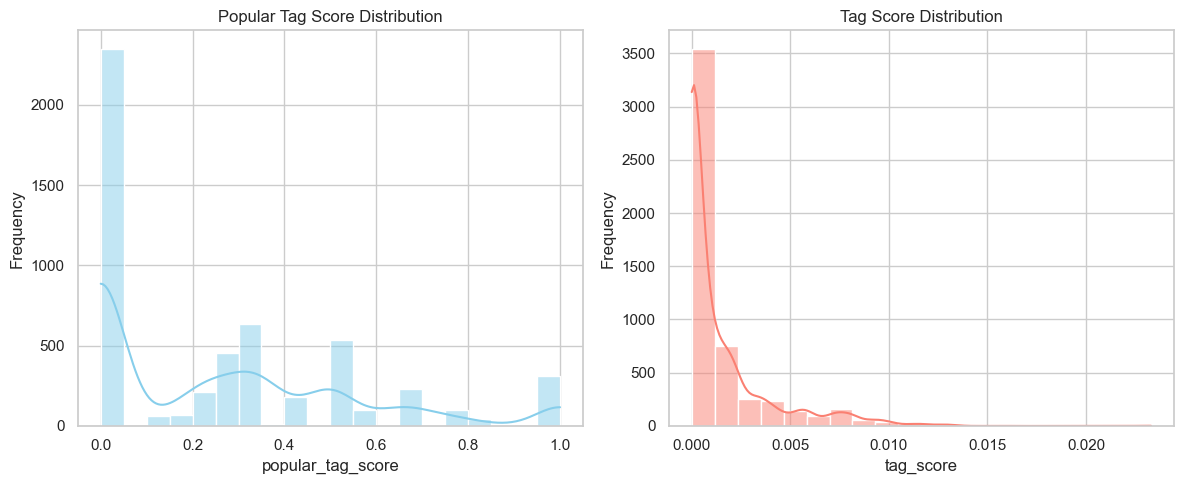

In [43]:
plt.figure(figsize=(12, 5))
# Histogram và KDE cho popular_tag_score
plt.subplot(1, 2, 1)
sns.histplot(df["popular_tag_score"], kde=True, bins=20, color='skyblue')
plt.title("Popular Tag Score Distribution")
plt.xlabel("popular_tag_score")
plt.ylabel("Frequency")

# Histogram và KDE cho tag_score
plt.subplot(1, 2, 2)
sns.histplot(df["tag_score"], kde=True, bins=20, color='salmon')
plt.title("Tag Score Distribution")
plt.xlabel("tag_score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### 3.1 Tìm trọng số cho công thức tính tag_score

In [44]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
s
# Chọn đặc trưng và mục tiêu
X = df[["has_person_tag", "has_place_tag", "has_event_tag", "has_org_tag"]]
y = df["popularity_score"]  # hoặc df["popular_level_encoded"]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# Xoá các cột trùng theo tên (chỉ giữ cột đầu tiên xuất hiện)
df = df.loc[:, ~df.columns.duplicated()]

In [46]:
for alpha in [0.01, 0.1, 1, 10]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y)
    print(f"\nAlpha = {alpha}")
    for feature, coef in zip(X.columns, ridge.coef_):
        print(f"  {feature}: {coef:.4f}")


Alpha = 0.01
  has_person_tag: 0.0000
  has_place_tag: 0.0005
  has_event_tag: 0.0000
  has_org_tag: 0.0000

Alpha = 0.1
  has_person_tag: 0.0000
  has_place_tag: 0.0005
  has_event_tag: 0.0000
  has_org_tag: 0.0000

Alpha = 1
  has_person_tag: 0.0000
  has_place_tag: 0.0005
  has_event_tag: 0.0000
  has_org_tag: 0.0000

Alpha = 10
  has_person_tag: 0.0000
  has_place_tag: 0.0005
  has_event_tag: 0.0000
  has_org_tag: 0.0000


In [47]:
ridge = Ridge(alpha=1.0)  # alpha là hệ số điều chỉnh, càng lớn thì càng "ép" hệ số về 0
ridge.fit(X_scaled, y)

# In trọng số
for feature, coef in zip(X.columns, ridge.coef_):
    print(f"Ridge - {feature}: {coef:.4f}")

Ridge - has_person_tag: 0.0000
Ridge - has_place_tag: 0.0005
Ridge - has_event_tag: 0.0000
Ridge - has_org_tag: 0.0000


In [48]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [49]:
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

has_person_tag: 0.0000
has_place_tag: 0.0025
has_event_tag: 0.0000
has_org_tag: 0.0000


In [50]:
# Xuất DataFrame kết quả ra file CSV
df.to_csv('dataset3.csv', index=False)

### 3. Tag processing bản mới

In [12]:
from underthesea import ner
from typing import List, Dict

def extract_full_entities(tagged_sentence: List[tuple]) -> Dict[str, List[str]]:
    entities = {}
    current_entity = None
    current_type = None
    for word, pos, chunk, ner_tag in tagged_sentence:
        if ner_tag.startswith('B-'):
            if current_entity:
                entity_type = current_type
                if entity_type in entities:
                    entities[entity_type].append(current_entity)
                else:
                    entities[entity_type] = [current_entity]
            current_entity = word
            current_type = ner_tag[2:]  # Loại bỏ 'B-'
        elif ner_tag.startswith('I-'):
            if current_entity and ner_tag[2:] == current_type:
                current_entity += ' ' + word
        else:
            if current_entity:
                entity_type = current_type
                if entity_type in entities:
                    entities[entity_type].append(current_entity)
                else:
                    entities[entity_type] = [current_entity]
                current_entity = None
                current_type = None
    if current_entity:
        entity_type = current_type
        if entity_type in entities:
            entities[entity_type].append(current_entity)
        else:
            entities[entity_type] = [current_entity]
    return entities

In [13]:
def classify_tags(tags: List[str]) -> Dict[str, List[str]]:
    # Kiểm tra trường hợp tags không phải danh sách hoặc None
    if not isinstance(tags, list) or not tags:
        return {
            "famous_people": [],
            "places": [],
            "events": [],
            "organizations": [],
            "others": []
        }

    # Danh sách từ khóa
    event_keywords = [
        "AI", "trí tuệ nhân tạo", "world cup", "olympic", "hội nghị", "lễ hội", "sự kiện",
        "xét xử", "truy tố", "phiên tòa", "vụ án", "tai nạn", "động đất", "bão",
        "bầu cử", "diễn tập", "giải đấu", "chung kết", "bán kết", "sea games",
        "triển lãm", "liveshow", "ra mắt", "họp báo", "khai mạc", "tổng kết",
        "dự án", "phát hành", "hội thảo", "điều tra", "bị bắt", "biểu tình",
        "tấn công", "mở bán", "kêu gọi vốn", "IPO"
    ]
    person_keywords = [
        "diễn viên", "ca sĩ", "cầu thủ", "huấn luyện viên", "giáo sư", "tiến sĩ", "bác sĩ",
        "luật sư", "phóng viên", "nhà báo", "giám đốc", "tổng thống", "thủ tướng",
        "chủ tịch", "công an", "kiểm sát", "bộ trưởng", "tác giả", "nhà văn",
        "thí sinh", "người mẫu", "nghệ sĩ", "MC", "CEO", "CTO", "diễn giả", "học sinh", "sinh viên"
    ]
    province_aliases = {
        "Hà Nội": ["HN", "TP Hà Nội", "Thủ đô"],
        "Hồ Chí Minh": ["HCM", "TP HCM", "TP. HCM", "Sài Gòn", "SG"],
        "Đà Nẵng": ["TP Đà Nẵng"],
        "Cần Thơ": ["TP Cần Thơ"],
        "Hải Phòng": ["HP", "TP Hải Phòng"],
        "Huế": ["Thừa Thiên Huế"],
        "Nha Trang": ["TP Nha Trang"],
        "Vũng Tàu": ["Bà Rịa Vũng Tàu", "TP Vũng Tàu"],
        "Biên Hòa": ["TP Biên Hòa"],
        "Thừa Thiên Huế": ["Huế"],
        "Đắk Lắk": ["Daklak"],
        "Đắk Nông": ["Daknong"],
    }
    place_keywords = list(province_aliases.keys()) + [
        "Hà Nội", "TP HCM", "TP. HCM", "Hồ Chí Minh", "HN", "HCM", "Đà Nẵng", "Cần Thơ", "Hải Phòng",
        "Bình Dương", "Biên Hòa", "Bắc Ninh", "Bắc Giang", "Nha Trang", "Vũng Tàu", "Huế","Kiên Giang", "Vĩnh Long", "An Giang", "Tiền Giang"
        "Quảng Ninh", "Đắk Lắk", "Thanh Hóa", "Nghệ An", "trường học", "bệnh viện",
        "công viên", "trung tâm thương mại", "sân bay", "nhà ga", "tòa nhà", "khu công nghiệp",
        "trường đại học", "trung tâm y tế", "khu dân cư", "trụ sở", "sở công an"
    ]
    org_keywords = [
        "công ty", "tập đoàn", "doanh nghiệp", "hiệp hội", "tổ chức",
        "bộ", "sở", "trung tâm", "viện", "ngân hàng", "trường học"
    ]

    # Chuẩn hóa địa danh
    normalized_places = {}
    for canonical, aliases in province_aliases.items():
        for alias in aliases:
            normalized_places[alias.lower()] = canonical

    # Khởi tạo các nhóm
    famous_people = []
    places = []
    events = []
    organizations = []
    others = []

    for tag in tags:
        tag_lower = tag.lower()
        classified = False

        if any(keyword.lower() in tag_lower for keyword in event_keywords):
            events.append(tag)
            classified = True
        elif tag_lower in normalized_places:
            places.append(normalized_places[tag_lower])
            classified = True
        elif any(keyword.lower() in tag_lower for keyword in place_keywords):
            places.append(tag)
            classified = True
        elif any(keyword.lower() in tag_lower for keyword in org_keywords):
            organizations.append(tag)
            classified = True
        elif any(keyword.lower() in tag_lower for keyword in person_keywords):
            famous_people.append(tag)
            classified = True

        if not classified:
            text = f"{tag} là một thực thể."
            tagged = ner(text)
            entities_dict = extract_full_entities(tagged)

            if tag in entities_dict.get('PER', []):
                famous_people.append(tag)
            elif tag in entities_dict.get('LOC', []):
                places.append(normalized_places.get(tag_lower, tag))
            elif tag in entities_dict.get('ORG', []):
                organizations.append(tag)
            elif tag in entities_dict.get('MISC', []):
                others.append(tag)
            else:
                others.append(tag)

    return {
        "famous_people": famous_people,
        "places": places,
        "events": events,
        "organizations": organizations,
        "others": others
    }

In [14]:
# Tách tags từ chuỗi ngăn cách bởi dấu phẩy
def preprocess_tags(tag_str):
    if isinstance(tag_str, str):
        return [tag.strip() for tag in tag_str.split(',') if tag.strip()]
    return []

df['tags'] = df['tags'].apply(preprocess_tags)

# Áp dụng hàm classify_tags
df['classified_tags'] = df['tags'].apply(classify_tags)

In [15]:
#  Tạo các cột boolean từ classified_tags
df['has_famous_people_tag'] = df['classified_tags'].apply(lambda x: len(x['famous_people']) > 0)
df['has_place_tag'] = df['classified_tags'].apply(lambda x: len(x['places']) > 0)
df['has_event_tag'] = df['classified_tags'].apply(lambda x: len(x['events']) > 0)
df['has_org_tag'] = df['classified_tags'].apply(lambda x: len(x['organizations']) > 0)

In [17]:
# Tạo features kiểm tra bài báo có comments và interactions hay không
df['has_comments'] = (df['comments'] > 0).astype(int)
df['has_interactions'] = (df['interactions'] > 0).astype(int)

In [18]:
df.to_csv('dataset3.csv', index=False)